In [1]:
import seaborn as sns
iris= sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
from sklearn.decomposition import PCA


X_iris=iris.drop('species',axis=1)
y_iris=iris['species']

X_iris.shape
y_iris.shape

(150,)

In [3]:
model = PCA(n_components=2)
model.fit(X_iris)

PCA(n_components=2)

In [4]:
X_2D=model.transform(X_iris)

iris['PCA1']=X_2D[:,0]
iris['PCA2']=X_2D[:,1]

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


C:\Users\kerem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


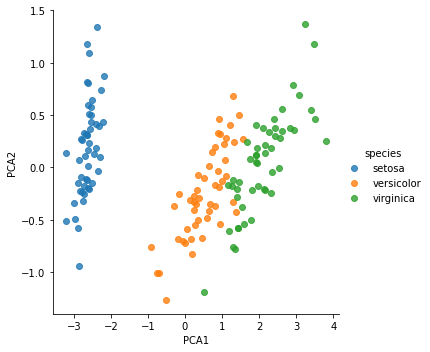

In [5]:
import seaborn as sns

sns.lmplot('PCA1','PCA2',hue='species',data=iris,fit_reg=False)

In [6]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3,covariance_type='full')

model.fit(X_iris)

GaussianMixture(n_components=3)

In [7]:
y_gmm=model.predict(X_iris)

iris['kumeleme']=y_gmm

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,kumeleme
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1


C:\Users\kerem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


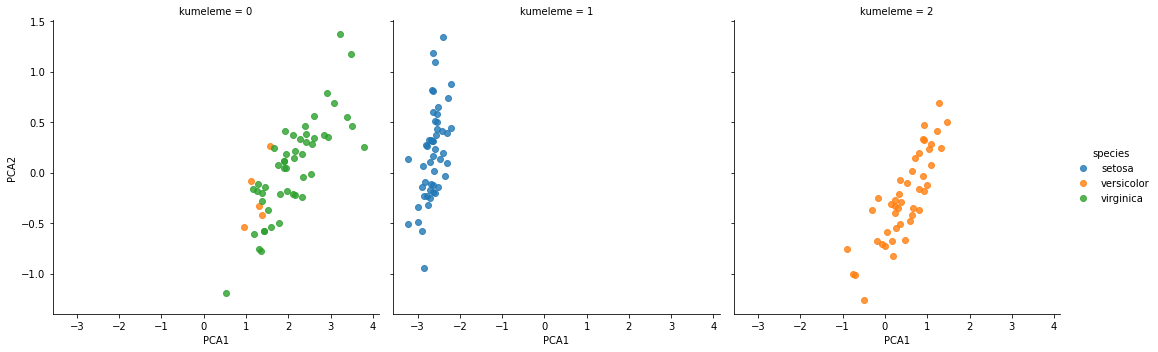

In [8]:
sns.lmplot('PCA1','PCA2',hue='species',data=iris,col='kumeleme',fit_reg=False)

In [9]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits=load_digits()

digits.images.shape


(1797, 8, 8)

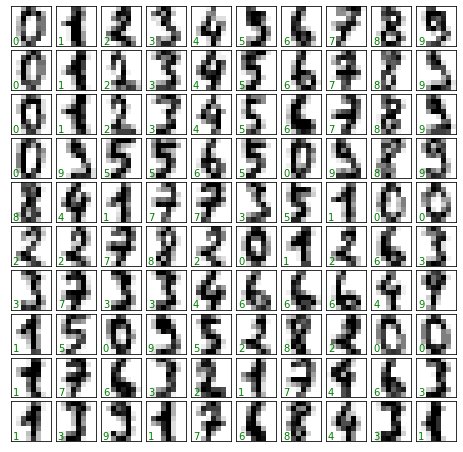

In [10]:
fig, axes=plt.subplots(10,10,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(digits.target[i]),transform=ax.transAxes,color='green')

In [11]:
X=digits.data
y=digits.target

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [12]:
from sklearn.manifold import Isomap

iso= Isomap(n_components=2)

iso.fit(X)

Isomap()

In [13]:
data2=iso.transform(X)
data2.shape

(1797, 2)

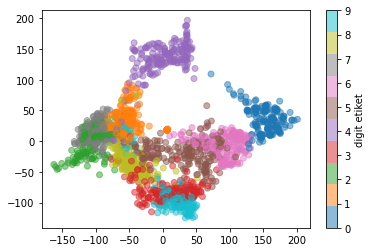

In [16]:
plt.scatter(data2[:,0],data2[:,1],c=digits.target,  alpha=0.5, cmap=plt.cm.get_cmap('tab10',10))
plt.colorbar(label='digit etiket',ticks=range(10))

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)



In [20]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()

model.fit(X_train,y_train)

GaussianNB()

In [23]:
y_model=model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_model)

0.8333333333333334

In [25]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_model)

Text(83.40000000000006, 0.5, 'Actual Value')

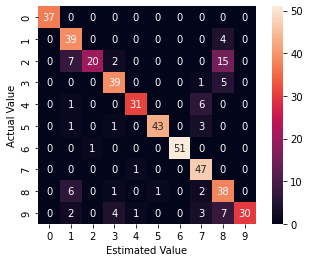

In [28]:
sns.heatmap(mat,square=True,annot=True ,cbar=True )
plt.xlabel('Estimated Value')
plt.ylabel('Actual Value')